# Lab: Central Limit Theorem

Authors: Yuna Liu and Kun Han

Date: 2022/1/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
from scipy.stats import norm
sns.set()

## Uppgifter 1

In this exercise, we generate random variable $X$ for different sample sizes and simulate for 1000 times to calculate the mean $\bar X$ and standardlized sample mean. As changing the sample sizes, we observe and compare the histograms and curves by using Central Limit Theorem. Expected mean value $\mu_{\bar X}$, standard devition $\sigma_{\bar X}$ and confidence interval will be calculated and hypothesis will be discussed.

<h3>Expected mean and standard deviation can be calculated by:</h3>

$ \mu_{\bar X} = E(X) = \frac{1}{n}\sum_{i=1}^{n} X_i$ 

$\sigma_{\bar X} = \sqrt{V(X)} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i - \mu_{\bar X})^2}$

where $ X_i$ is the observations in population

In [2]:
# calculate the population mean my
my = (4+5+6+7)/4

# standard deviation of population: sigma
sigma = np.sqrt((1/4)*(4-my)**2 + (1/4)*(5-my)**2 + (1/4)*(6-my)**2 + (1/4)*(7-my)**2).round(2)

def CLT_test_discrete(sample_size, N_samples):
    
    sample_mean = lambda sample_size:np.mean(np.random.randint(4,8,sample_size)) # function for sample mean
    standlized_samples = [(sample_mean(sample_size)-my)/(sigma/np.sqrt(sample_size)) for i in range(N_samples)] # loop for standlized samples
    
    plt.figure(figsize=(20,10))
    sns.distplot(standlized_samples, bins=20)
    plt.title(f'Histogram of discrete uniform distribution of n= {sample_size}', fontsize=20)
    plt.xlabel('Standardized Sample Mean', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.show()

# Defind a function for sample size and the number of loops
# Return the histogram figures

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


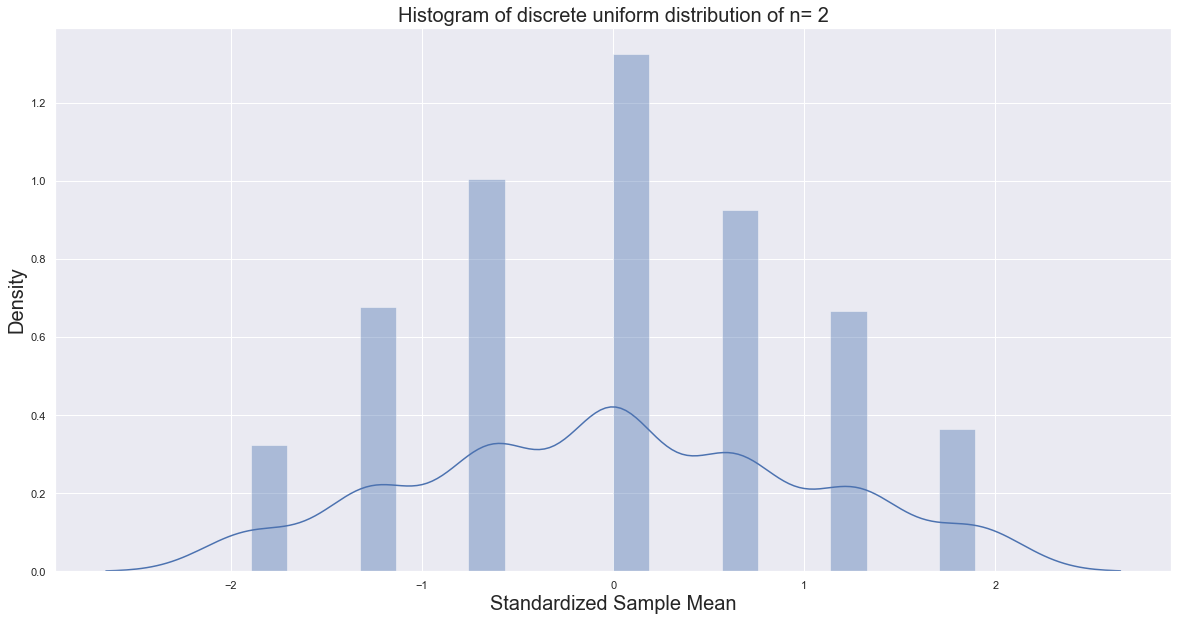

In [3]:
CLT_test_discrete(2,1000)

When using the sample size of 2, the sample mean tend to be near our standardized mean 0. However, the curve is not seems to be normal distributed.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


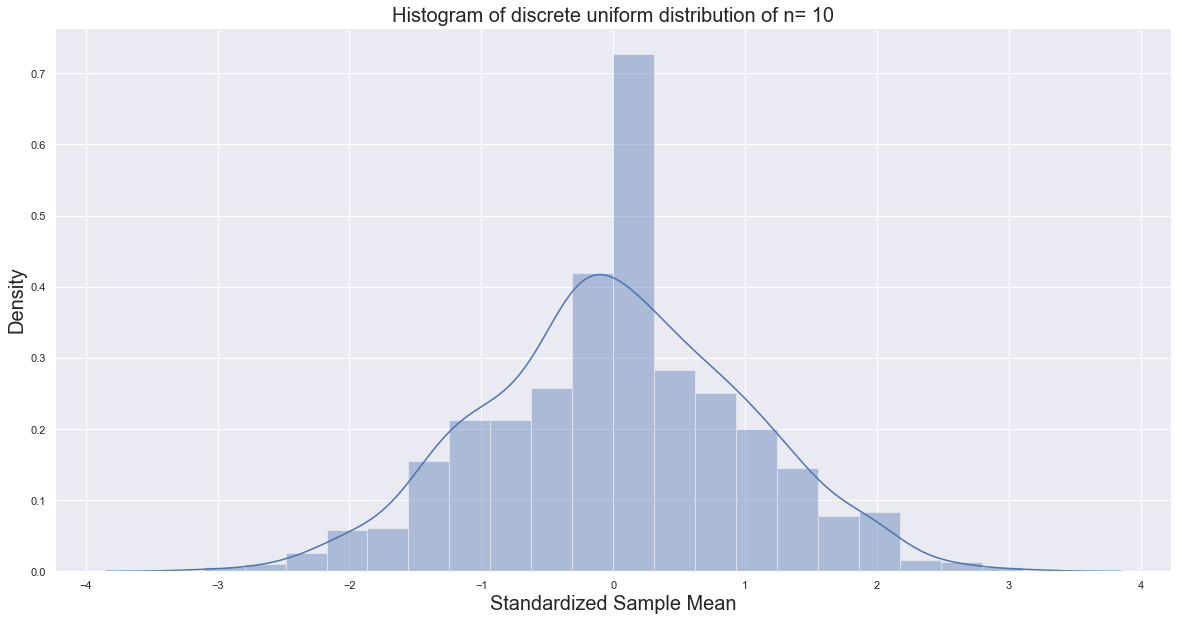

In [4]:
CLT_test_discrete(10,1000)

The shape become more smoothy.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


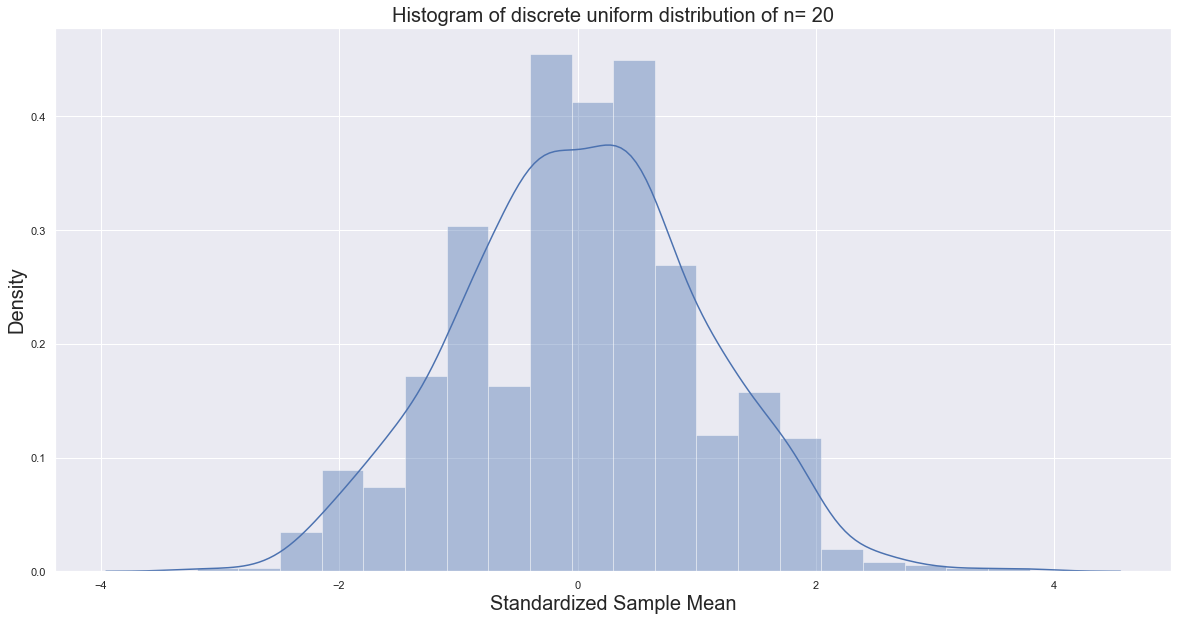

In [5]:
CLT_test_discrete(20,1000)

The curve perform better to be normal distributed when we adjust the sample size to 20.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


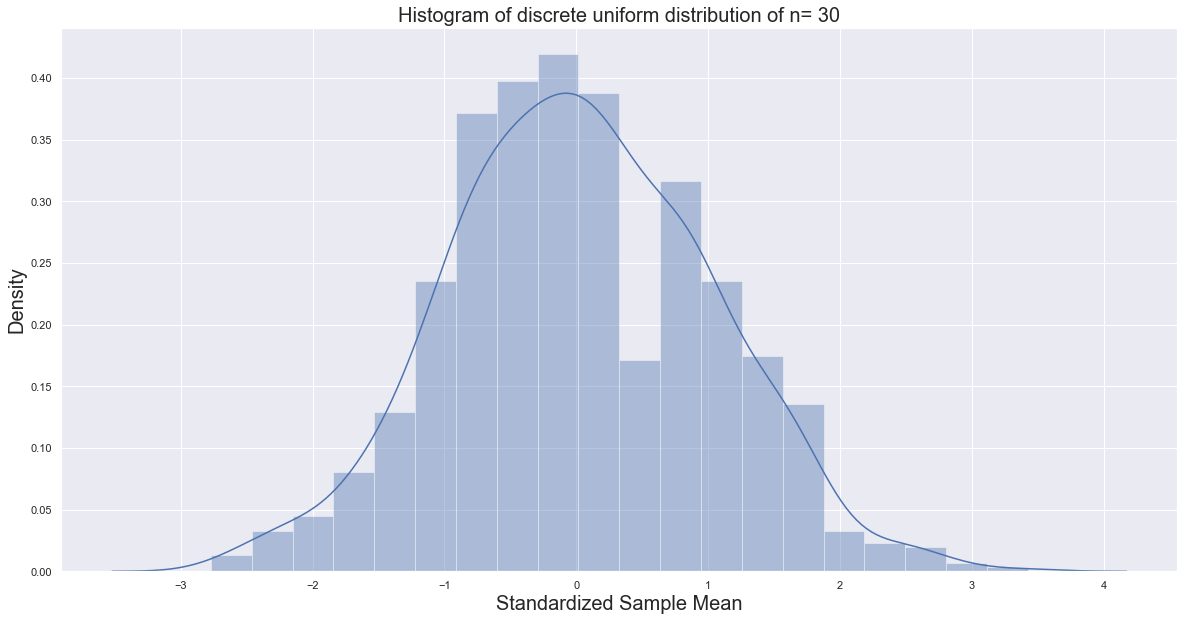

In [6]:
CLT_test_discrete(30,1000)

The more samples we take, the more likely that the sampling distribution of the mean will be narmal distributed.

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


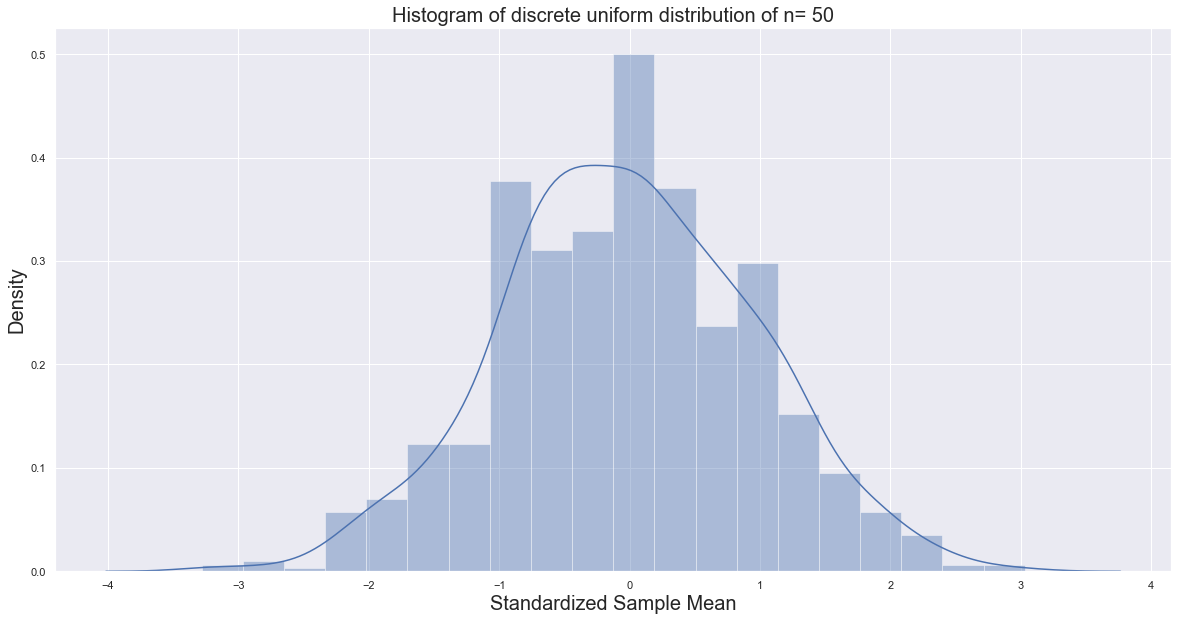

In [7]:
CLT_test_discrete(50,1000)

From the previous figures, we found that the distribution of the standarized sample mean trends to be normal distribution(informally a " bell curve " with mean equal to 0) as n becomes larger. The underlying theorem is Central Limit Theorem. As n is large, the distribution of the standarized sample mean becomes normal distribution

### Confidence interval can be calculate by equation:

${\bar x}\pm Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}$

Because the standard diviation of population $\sigma$ is known

In [9]:
N_samples=1000
sample_size=50
count=0

for x in range(N_samples):
    sample_n=np.random.randint(4,8,sample_size)
    x_bar_n=sample_n.mean()
    #create 95% confidence interval for population mean
    # scs.norm.ppf(.975).round(2) is 1.96
    z_critical_value = scs.norm.ppf(1-.05/2).round(2)
    up_limit = x_bar_n + z_critical_value*sigma/np.sqrt(sample_size)
    down_limit = x_bar_n - z_critical_value*sigma/np.sqrt(sample_size)
    if down_limit < my < up_limit:
        count += 1 
print(f'For {count} of 1000 times, the confidence interval includes the population mean, which is a proportion of {count/samples*100:.2f}%')

For 945 of 1000 times, the confidence interval includes the population mean, which is a proportion of 94.50%


Around 95% of times does the population mean fall into in the confidence interval. This expectation is approximately the same as the test result.

### Now suppose we want to do a hypothesis test for the population mean with

$H_0: \mu \leq 5.1$

$H_A: \mu > 5.1$

with the significant level $0.05$

Here the population $\sigma$ is known so we need calculate the $z$ value and $P$-value:

$z = \frac {\bar x - \mu} {\sigma /\sqrt{n}}$

Because it is a one side test, so $P$-value will be $P(Z>z)$

In [10]:
# Styrka= P(H0 förkastas | H0 är falsk)
# my = 5.5 > 5.1 så H0 är falsk i denna uppgifter
# the goal is to count how many times the test reject H0

N_samples=1000
sample_size=50
count=0


for x in range(N_samples):
    sample_n=np.random.randint(4,8,sample_size)
    x_bar_n=sample_n.mean()

    test = (x_bar_n-5.1)/(sigma/np.sqrt(sample_size)) # Z value
    p_värde = 1- scs.norm.cdf(test) 

    if p_värde < 0.05: # p_value is smaller than significant value 0.05, reject H0.
        count += 1 

print(f'The styrka is {count/1000*100:.2f}%, which means the probability of noll hypothesis to be rejected when H0 is wrong is {count/1000*100:.2f}% .')

The styrka is 79.10%, which means the probability of noll hypothesis to be rejected when H0 is wrong is 79.10% .


## Uppgifter 2

In [11]:
#Define an array for N_of_samples samples, each sample size of sample_size
def histogram_continous_uniform(sample_size, N_of_samples):
    samples_n = np.zeros((N_of_samples,sample_size)) 
    #Defining parameters from our population distribution
    lo, hi = 7,11
    #Creating for loop
    for x in range(N_of_samples):
        samples_n[x] = np.random.uniform(lo, hi, sample_size)

    plt.figure(figsize=(20,10))
    sns.distplot(samples_n, bins=20)
    plt.title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample', fontsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


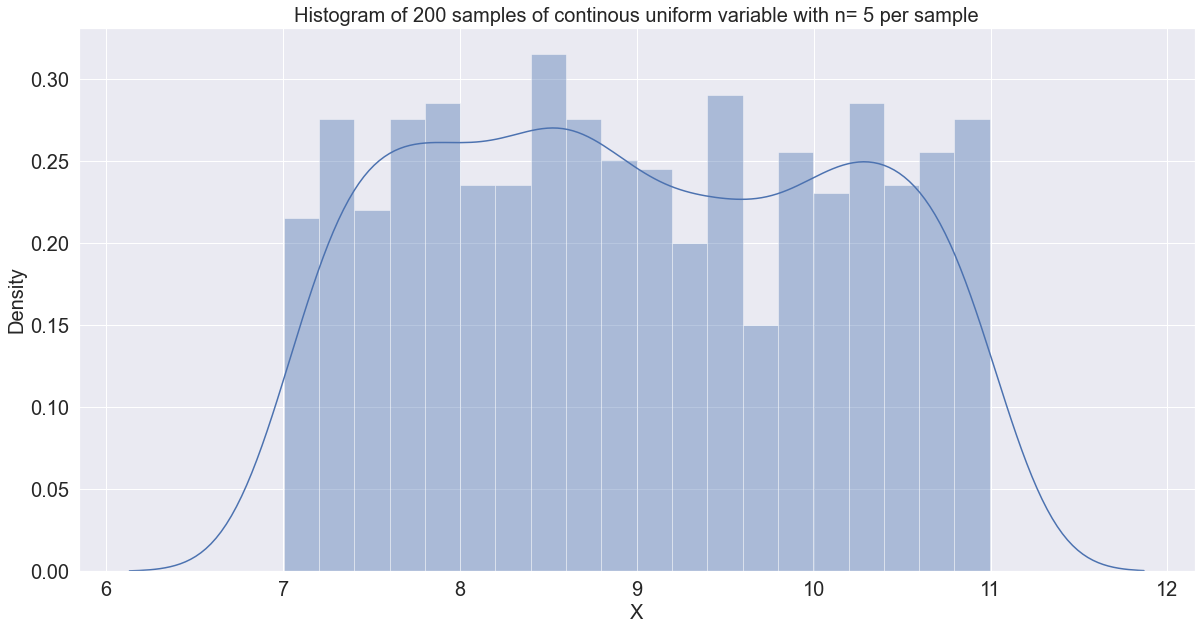

In [12]:
histogram_continous_uniform(5, 200)

In [13]:
def histogram_continous_uniform_standarized(sample_size, N_of_samples):
    # n is the sample_size, and samples stands for the number of samples
    # Define an array for N_of_samples samples per sample size of sample_size

    samples_n = np.zeros((N_of_samples,sample_size))

    #Defining parameters from our population distribution
    lo, hi = 7,11

    # We calculate the population mean my
    my = (hi+lo)/2

    # We calculate the population standard deviation sigma
    sigma = (hi-lo)/np.sqrt(12).round(2)

    # We create a X variable with n observations in each loop
    # We calculate the sample mean for this X variable as x_bar_n in each loop
    # Loop for number of samples times, we save x_bar_n to x_bars_n during each loop
    # After that, we plot the distribution of x_bars_n

    x_bars_n=np.zeros(N_of_samples)

    for x in range(N_of_samples):
        sample_n=np.random.uniform(lo, hi, sample_size)
        x_bar_n=sample_n.mean()
        x_bars_n[x]= (x_bar_n-my)/(sigma/np.sqrt(sample_size))
    
    x_bars_n

    plt.figure(figsize=(20,10))
    sns.distplot(x_bars_n, bins=20)
    plt.title(f'Histogram of {N_of_samples} samples of continous uniform variable with n= {sample_size} per sample', fontsize=20)
    plt.xlabel('Standardized Sample Mean', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


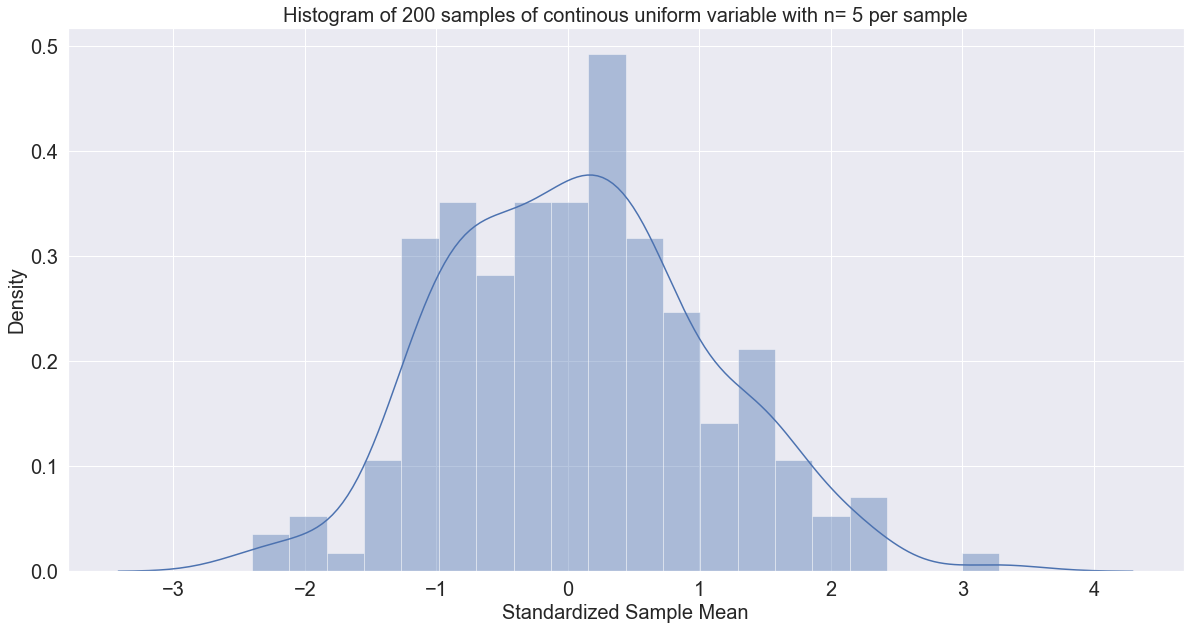

In [14]:
histogram_continous_uniform_standarized(5, 200)

10) Hur beräknar du μ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

11) Hur beräknar du σ_X ̅  i 9)? (Svara med en formel, uträkning baserad på formeln och ett numeriskt svar)

12) Generera 200 stickprov av storlek 20 och gör ett histogram av alla 4000 observationerna. Tyder histogrammet på att data är normalfördelade?*

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


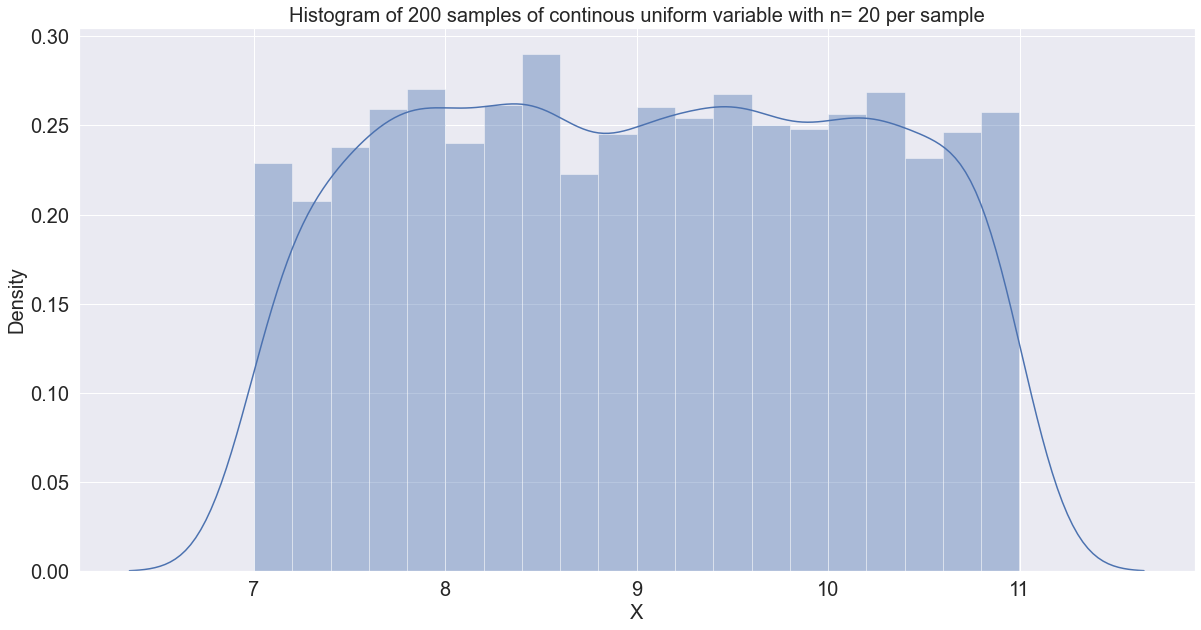

In [15]:
histogram_continous_uniform(20, 200)

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


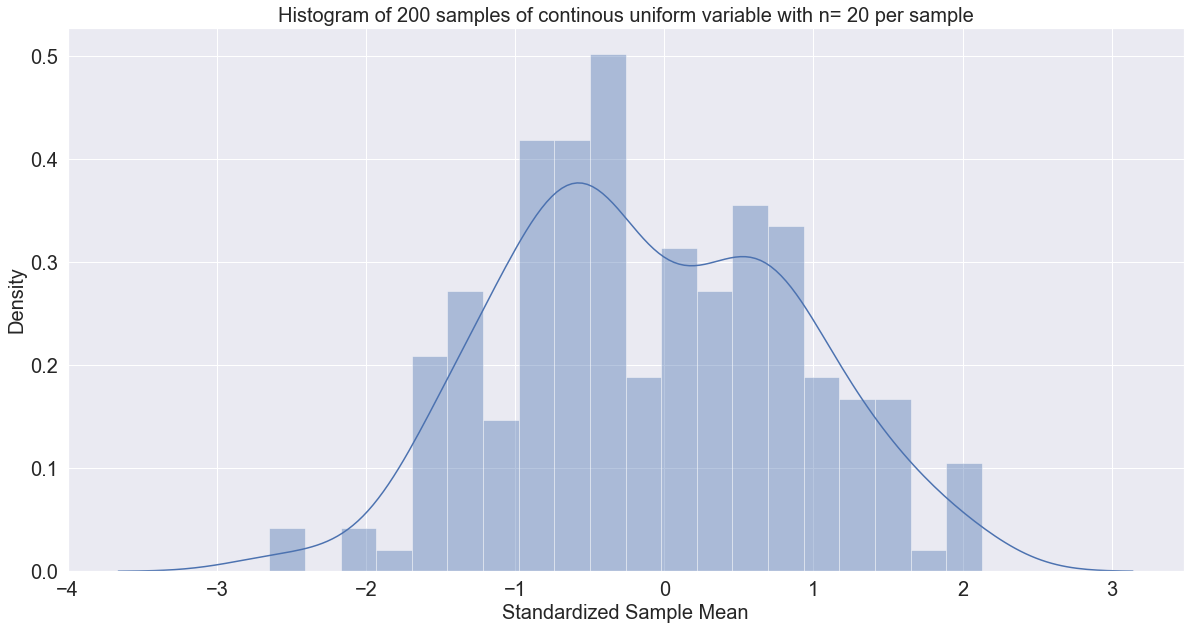

In [16]:
histogram_continous_uniform_standarized(20, 200)

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


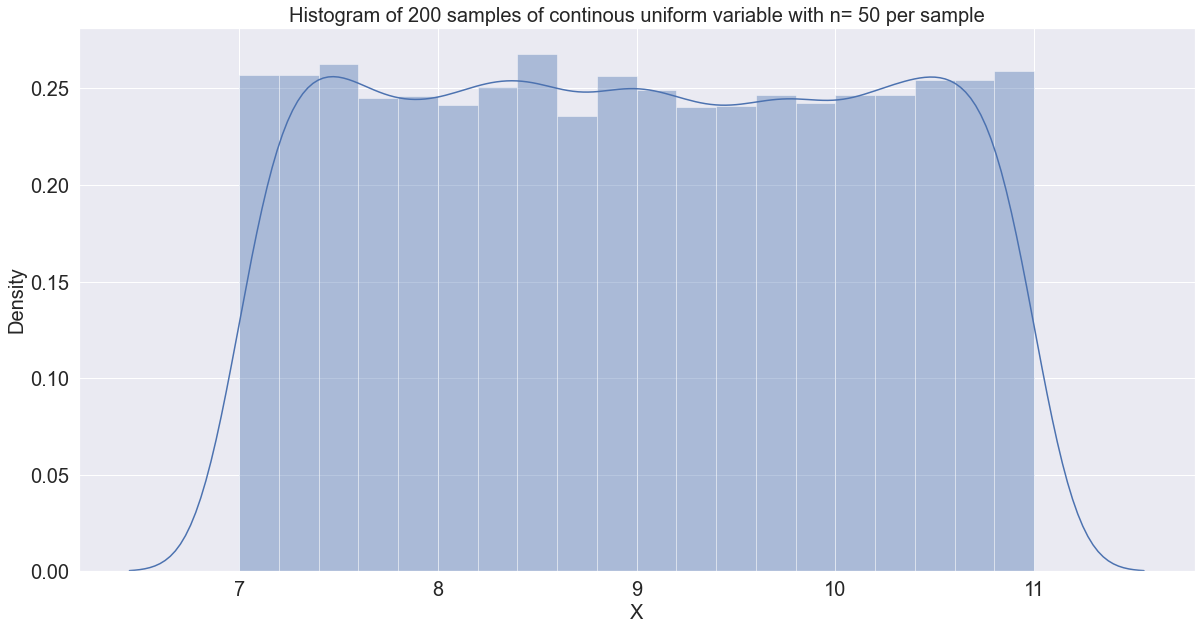

In [17]:
histogram_continous_uniform(50, 200)

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\statistic-methods-jEi7ZLFM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


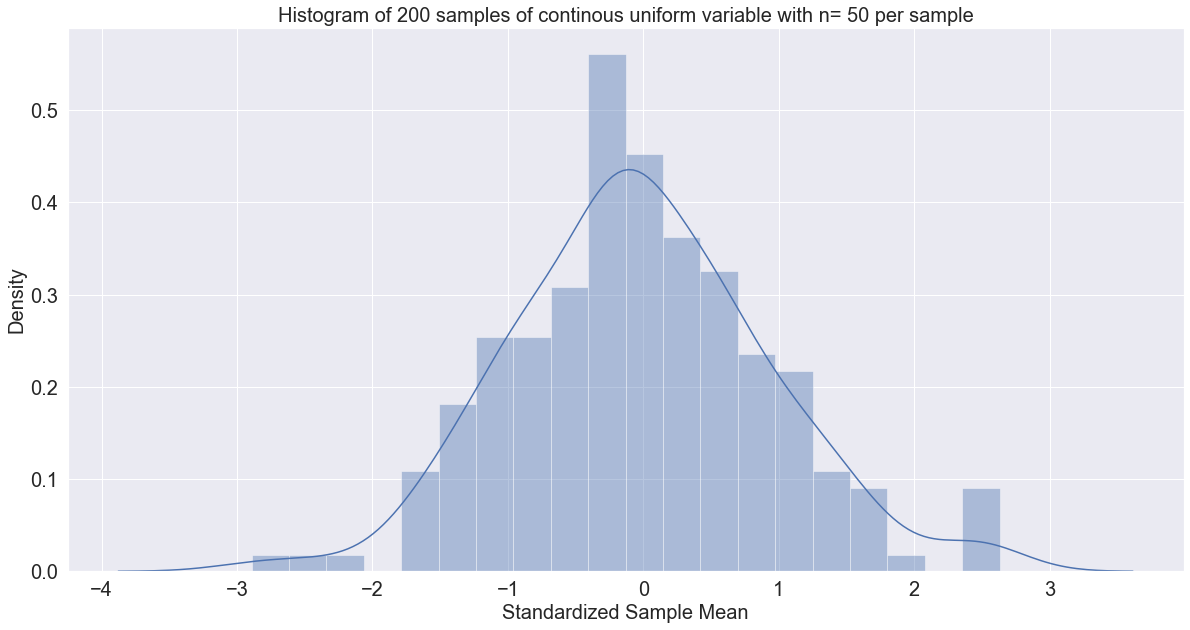

In [21]:
histogram_continous_uniform_standarized(50, 200)